In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  Abstract: 
### Predict whether income exceeds 50K/yr  based on census data. Also known as "Census Income" dataset.

In [4]:
columns = ['age','workclass','fnlwgt','education','education-num',
          'marital-status','occupation','relationship','race','sex',
          'capital-gain','capital-loss','hours-per-week','native-country','income']

In [5]:
# # names = pd.read_csv('data/adult.names', error_bad_lines=False)
df = pd.read_csv('data/adult.data', names=columns)
# test = pd.read_csv('data/adult.test')
# index = pd.read_csv("data/index")

In [6]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Verificando a quantidade de valores nulos e Nan:

In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Por questões de padronização da informação, substitui os valores categóricos de "income" para:
### <= 50k/yr  =  0
### > 50k/yr  =  1

In [9]:
df.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [10]:
df["income"]= df["income"].replace(' <=50K', 0) 
df["income"]= df["income"].replace(' >50K', 1) 

In [11]:
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

## Estatisticas Descritivas

#### 1.1 - Escolher dois atributos quaisquer e calcular suas estatísticas descritivas (global e por classe), organizando-as conforme tabela abaixo.

### Globais

In [12]:
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [13]:
df['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

### Por classes, classe 0:

In [14]:
dfClass1 = df[df['income']==0]

In [15]:
dfClass1.shape

(24720, 15)

In [16]:
dfClass1['age'].describe()

count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

In [17]:
dfClass1['hours-per-week'].describe()

count    24720.000000
mean        38.840210
std         12.318995
min          1.000000
25%         35.000000
50%         40.000000
75%         40.000000
max         99.000000
Name: hours-per-week, dtype: float64

### Por classes, classe 1:

In [18]:
dfClass2 = df[df['income']==1]

In [19]:
dfClass2.shape

(7841, 15)

In [20]:
dfClass2['age'].describe()

count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

In [21]:
dfClass2['hours-per-week'].describe()

count    7841.000000
mean       45.473026
std        11.012971
min         1.000000
25%        40.000000
50%        40.000000
75%        50.000000
max        99.000000
Name: hours-per-week, dtype: float64

### 1.2 – Escolha uma das classes (de preferência a que possuir mais dados) e estime o (i) seu centróide e (ii) sua matriz de covariância. Mostrar como foi realizado/feito/implementado este subitem.

In [22]:
dfClass1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,0
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [23]:
print(dfClass1['age'].sum())
print(len(dfClass1['age']))
print(dfClass1['age'].mean())


909294
24720
36.78373786407767


In [24]:
dfClass1.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.078905,-0.051501,0.053572,0.029794,0.046286,NaN
fnlwgt,-0.078905,1.000000,-0.054418,-0.000130,-0.012997,-0.021430,NaN
education-num,-0.051501,-0.054418,1.000000,0.011695,0.016375,0.082319,NaN
capital-gain,0.053572,-0.000130,0.011695,1.000000,-0.026413,0.017938,NaN
capital-loss,0.029794,-0.012997,0.016375,-0.026413,1.000000,0.018695,NaN
hours-per-week,0.046286,-0.021430,0.082319,0.017938,0.018695,1.000000,NaN
income,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  1.3 – Para a classe do Subitem 1.2, fazer o gráfico de dispersão dos atributos escolhidos para resolução do Subitem 1.1. Colocar nomes dos atributos nos eixos dos gráficos.

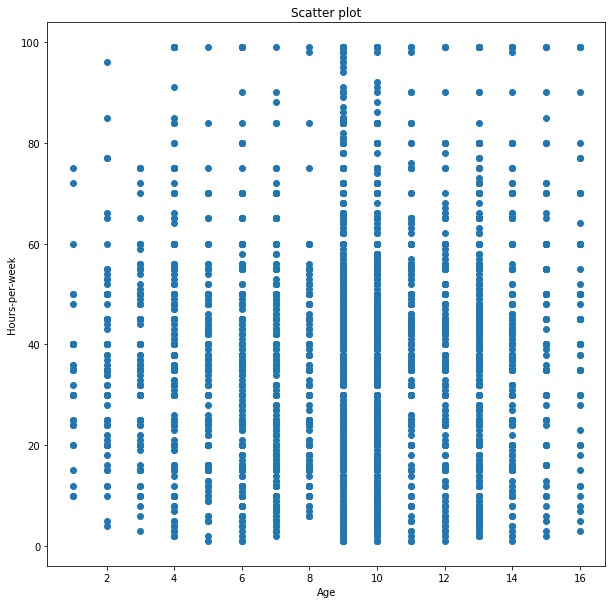

In [25]:
plt.figure(figsize=(10,10))
plt.title('Scatter plot')
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.scatter(x=dfClass1['education-num'],y=dfClass1['hours-per-week'])
plt.show()

### 1.4 – O diagrama de dispersão do Subitem 1.3 indica a existência de algum tipo de correlação entre os dois atributos escolhidos? Detalhe sua resposta.

Acredito que não exista correlação grande entre age e hours-per-week

### 1.5 - Estimar o coeficiente de correlação entre os dois atributos escolhidos para resolução do Subitem 1.3 para a classe escolhida. Mostrar os cálculos e qual método/procedimento foi utilizado para realizá-los.

In [26]:
dfClass1[['age','hours-per-week']].corr()

,age,hours-per-week
age,1.000000,0.046286
hours-per-week,0.046286,1.000000


### 1.6 – Determinar os parâmetros a (inclinação) e b (intercepto) da reta de tendência para os gráfico de dispersão mostrado no Subitem 1.3. Mostrar os cálculos e qual método/procedimento foi utilizado

### 1.7 - Escolha um dos atributos usados na resolução do Subitem 1.1 e gere o histograma correspondente para uma classe de sua escolha. A distribuição do atributo escolhido assemelha-se a uma gaussiana? Há suspeita de presença de outliers nos dados? Detalhe sua resposta.

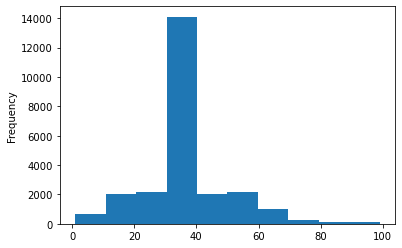

In [86]:
dfClass1['hours-per-week'].plot(kind='hist')

In [87]:
med = dfClass1['hours-per-week'].mean()
std = dfClass1['hours-per-week'].std()
a = (med-std)
b = (med+std)
c = (med-2*std)
d = (med+2*std)
e = (med-3*std)
f = (med+3*std)

In [88]:
df[df['hours-per-week'].between(a, b)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [89]:
### Outra maneira de fazer a mesma análise

In [90]:
df[(df['hours-per-week'] >= a) & (df['hours-per-week'] <= b)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [91]:
df[df['hours-per-week'].between(a, b)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


### media - sigma / media + sigma

In [94]:
len(dfClass1[dfClass1['hours-per-week'].between(a, b)])/len(dfClass1)

0.7637944983818771

### media - 2 * sigma / media + 2 * sigma

In [95]:
len(dfClass1[dfClass1['hours-per-week'].between(c, d)])/len(dfClass1)

0.9360436893203884

### media - 3 * sigma / media + 3 * sigma

In [96]:
len(dfClass1[dfClass1['hours-per-week'].between(e, f)])/len(dfClass1)

0.9898058252427184

In [97]:
np.array(dfClass1['hours-per-week'])

array([40, 13, 40, ..., 38, 40, 20], dtype=int64)

In [130]:
dfClass1['hours-per-week']

0        40
1        13
2        40
3        40
4        40
         ..
32553    11
32555    40
32556    38
32558    40
32559    20
Name: hours-per-week, Length: 24720, dtype: int64

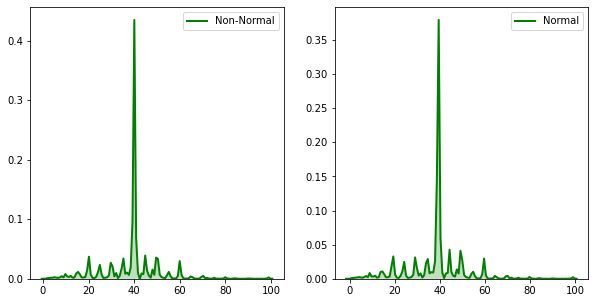

In [137]:
# import modules 
import numpy as np 
from scipy import stats 
  
# plotting modules 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
# generate non-normal data (exponential) 
original_data = np.asarray(dfClass1['hours-per-week'].values)



# transform training data & save lambda value 
fitted_data, fitted_lambda = stats.boxcox(original_data)
  
# creating axes to draw plots 
fig, ax = plt.subplots(1, 2) 
  
# plotting the original data(non-normal) and  
# fitted data (normal) 
sns.distplot(original_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
  
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]) 
  
# adding legends to the subplots 
plt.legend(loc = "upper right") 
  
# rescaling the subplots 
fig.set_figheight(5) 
fig.set_figwidth(10) 

In [138]:
print(f"Lambda value used for Transformation: {fitted_lambda}") 

Lambda value used for Transformation: 1.003149546943228


In [100]:
med = fitted_data.mean()
std = fitted_data.std()
a = (med-std)
b = (med+std)
c = (med-2*std)
d = (med+2*std)
e = (med-3*std)
f = (med+3*std)

In [101]:
fittedNormal = pd.DataFrame(fitted_data,columns=['Values'])

In [102]:
len(fittedNormal[fittedNormal['Values'].between(a, b)])/len(fittedNormal)

0.7637944983818771

In [103]:
len(fittedNormal[fittedNormal['Values'].between(c, d)])/len(fittedNormal)

0.9360436893203884

In [104]:
len(fittedNormal[fittedNormal['Values'].between(e, f)])/len(fittedNormal)

0.9898058252427184

(array([  671.,  2062.,  2159., 14103.,  2043.,  2149.,  1020.,   292.,
          123.,    98.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

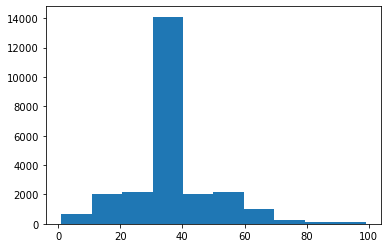

In [105]:
plt.hist(original_data)

(array([  671.,  2062.,  2159., 14103.,  3586.,   606.,  1020.,   292.,
          123.,    98.]),
 array([ 0.        ,  9.91309825, 19.82619651, 29.73929476, 39.65239302,
        49.56549127, 59.47858952, 69.39168778, 79.30478603, 89.21788429,
        99.13098254]),
 <a list of 10 Patch objects>)

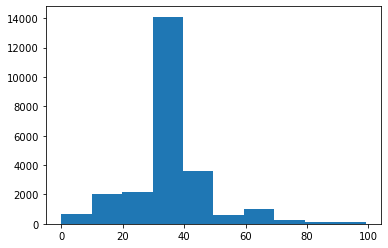

In [106]:
plt.hist(fitted_data)

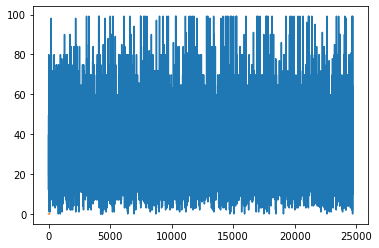

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = fitted_data.mean()
variance = fitted_data.var()
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, len(fitted_data))
plt.plot(fitted_data,kin)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.show()

AttributeError: module 'matplotlib.mlab' has no attribute 'normpdf'

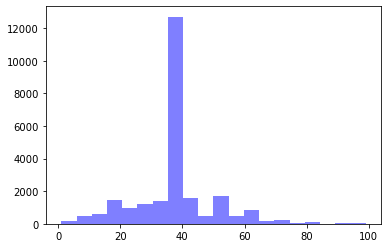

In [127]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# example data
mu = mu # mean of distribution
sigma = sigma # standard deviation of distribution
x = original_data

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)

# add a 'best fit' line
y = mlab.(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

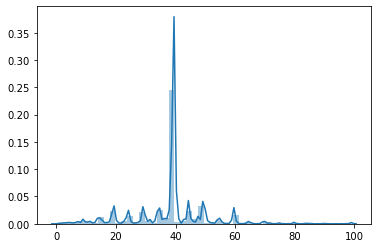

In [129]:

sns.distplot(fitted_data)

## Pré-Processamento

### Verificando cardinalidade

In [ ]:
df['native-country'].value_counts()

In [46]:
## Coletando para as colunas object, o numero de diferentes valores para a coluna.
object_nunique = list(map(lambda col: df[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

## Ordenando as informações em um dicionário, onde o primeiro valor é a coluna e o segundo a quantidade de valores diferentes
## dessa coluna
sorted(d.items(), key=lambda x: x[1])

[('sex', 2),
 ('race', 5),
 ('relationship', 6),
 ('marital-status', 7),
 ('workclass', 9),
 ('occupation', 15),
 ('education', 16),
 ('native-country', 42)]

In [45]:
##Quantidade de colunas que passam de 10 valores diferentes dentro dela, julgo cardinalidade 10 como um valor limite para
##utilizar One-Hot encoder, por exemplo, mas é algo a ser discutido e estudado.
object_cols = [col for col in df.columns if df[col].dtype == "object"]
count=0
for col in object_cols:
    if df[col].nunique() > 10:
        count+=1
count

3

In [53]:
dfClass.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000
